In [76]:
import numpy as np
import astroML
import socket
import os
import datetime
import pandas as pd

from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap, MultiTermFit

from astroML.time_series import \
    generate_power_law

%matplotlib inline

print('Current workstation: '+str(socket.gethostname()))
if socket.gethostname()=='Osian':
    base_dir="/home/caplarn/Documents/Variability/SteepPSDandLS/"
else:
    base_dir="/export/data1/caplarn/Documents/Variability/SteepPSDandLS/"
os.chdir(base_dir)   
print('Current time: '+str(datetime.datetime.now()))       

Current workstation: iapetus
Current time: 2017-05-08 11:14:15.558614


In [ ]:
y=astroML.time_series.generate_power_law(N=1024,dt=0.01,beta=2)

# Simple example 

In [ ]:
# Generate Data
np.random.seed(0)
N = 30
P = 0.3

t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

In [ ]:
#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=100, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

In [ ]:
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()

# Same but with random walk

In [ ]:
def compute_sf_log(ligth_curve_sort_and_clean):
    array_of_magnitude_differences = [];
    for n in range(len(ligth_curve_sort_and_clean)-1):
        array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
    array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
    array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
    Structure_Function_Log_Bins = [];
    Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,2))
    for n in range(1,len(Array_Of_Log_Limits)-1):
        single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
        Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
    Structure_Function_Log_Bins5=np.vstack(Structure_Function_Log_Bins)
    return Structure_Function_Log_Bins5

In [ ]:
N=100+4*365+1
y=0.42*astroML.time_series.generate_power_law(N,dt=1,beta=2)

In [ ]:
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)

In [ ]:
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

In [ ]:
t1 = np.random.randint(1,100, size=30)
t2= np.random.randint(1+365,100+365, size=30)
t3= np.random.randint(1+2*365,100+2*365, size=30)
t4= np.random.randint(1+3*365,100+3*365, size=30)
t5= np.random.randint(1+4*365,100+4*365, size=30)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0)


In [ ]:
t=np.concatenate((t1,t2,t3,t4,t5),axis=0)

In [ ]:
dy= 0.07 + 0.02 * np.random.rand(N)

In [ ]:
y_obs = np.random.normal(y, dy)[t]
dy_obs=dy[t]



In [ ]:
# Compute periodogram
period = 10 ** np.linspace(1, 3, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy_obs, omega, generalized=True)

In [ ]:
#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy_obs, omega, generalized=True,
                           N_bootstraps=100, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

In [ ]:
# Plot the results
fig = plt.figure(figsize=(10, 7.75))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy_obs, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-10, N+10)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy_obs)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()

# What prefactor is needed so that they all have same SF**2(100 days)

In [126]:
def compute_sf_log(ligth_curve_sort_and_clean):
    array_of_magnitude_differences = [];
    for n in range(len(ligth_curve_sort_and_clean)-1):
        array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
    array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
    array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
    Structure_Function_Log_Bins = [];
    Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,20,2))
    for n in range(1,len(Array_Of_Log_Limits)-1):
        single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
        Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
    Structure_Function_Log_Bins5=np.vstack(Structure_Function_Log_Bins)
    return Structure_Function_Log_Bins5

In [ ]:
N=100+6*365+1
y=3.25*astroML.time_series.generate_power_law(N,dt=1,beta=0.0)
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

In [ ]:
N=100+6*365+1
y=3.25*astroML.time_series.generate_power_law(N,dt=1,beta=0.5)
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

In [ ]:
N=100+6*365+1
y=2.45*astroML.time_series.generate_power_law(N,dt=1,beta=1.0)
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

In [ ]:
N=100+6*365+1
y=1.25*astroML.time_series.generate_power_law(N,dt=1,beta=1.5)
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

In [ ]:
N=100+6*365+1
y=0.45*astroML.time_series.generate_power_law(N,dt=1,beta=2.0)
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

In [ ]:
N=100+6*365+1
y=0.16*astroML.time_series.generate_power_law(N,dt=1,beta=2.5)
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

In [ ]:
N=100+10*365+1
y=0.058*astroML.time_series.generate_power_law(N,dt=1,beta=3)
ligth_curve_sort_and_clean=np.c_[(range(0,N),y)]
SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
x1_log=np.log10(SF_of_pure_simulation[:,0])
y1_log=np.log10(SF_of_pure_simulation[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,0))
# draw vertical line from (70,100) to (70, 250)
plt.plot([0,4], [-2, -2], 'k-', lw=2, ls='--')
plt.plot([2,2], [-4, 0], 'k-', lw=2, ls='--')

# Creating data with pure power law

In [82]:
slope_and_prefactor=np.c_[np.array([1,1.5,2,2.5,3]),np.array([2.45,1.25,0.45,0.16,0.058])]

In [83]:
NLC=100+24*365+1
N=100+4*365+1
#Set up the directories where the analysis is done and where the data is stored
base_dir="/export/data1/caplarn/Documents/Variability/SteepPSDandLS/"
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir)    
    try:
        os.stat(base_dir+str(n)+'/')
    except:
        os.mkdir(base_dir+str(n)+'/')
    os.chdir(base_dir+str(n)+'/')    
    for i in range(2000):
        t1 = np.random.randint(1,100, size=30)
        t2= np.random.randint(1+365,100+365, size=30)
        t3= np.random.randint(1+2*365,100+2*365, size=30)
        t4= np.random.randint(1+3*365,100+3*365, size=30)
        t5= np.random.randint(1+4*365,100+4*365, size=30)
        t=np.concatenate((t1,t2,t3,t4,t5),axis=0)
        y=0.45*astroML.time_series.generate_power_law(NLC,dt=1,beta=n)
        dy= 0.07 + 0.02 * np.random.rand(NLC)
        y_obs = np.random.normal(y, dy)[t]
        dy_obs=dy[t]
        np.save(str(i),np.c_[t,y_obs,dy_obs])


# Running LS

In [171]:
os.chdir(base_dir+str(1.0)+'/') 

data=np.load('9.npy')
t=data[:,0]
y_obs=data[:,1]
dy_obs=data[:,2]
# Compute periodogram
period = 10 ** np.linspace(1, 3, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy_obs, omega, generalized=True)
print(np.max(PS))

0.109092615642


In [154]:
#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy_obs, omega, generalized=True,
                           N_bootstraps=100, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

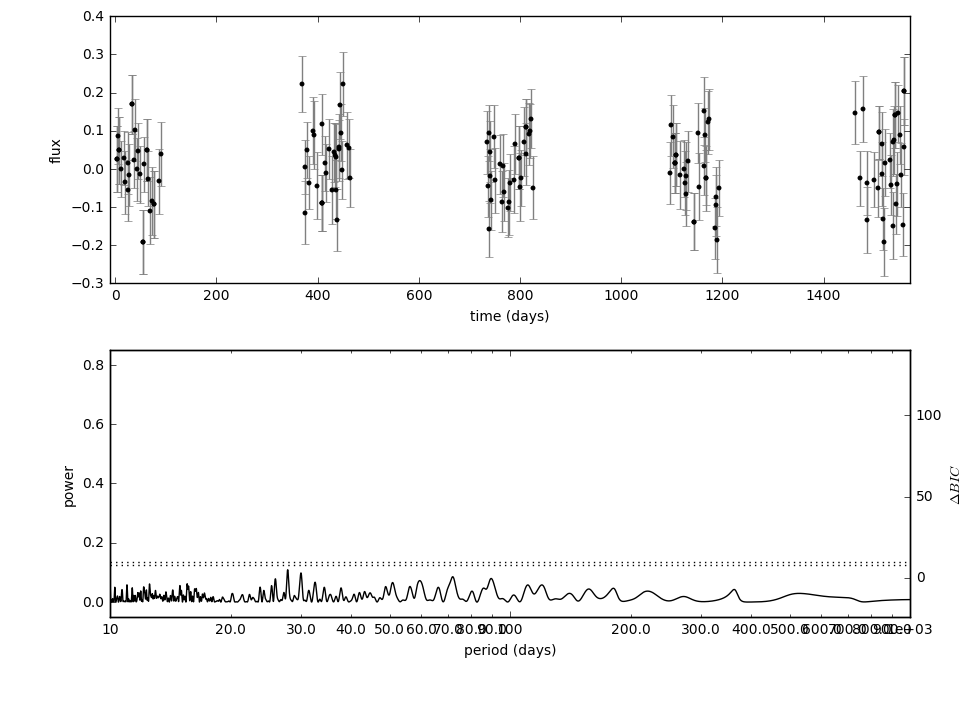

In [155]:
# Plot the results
fig = plt.figure(figsize=(10, 7.75))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy_obs, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-10, N+10)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy_obs)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()

# LS run for all curves

In [101]:
r=100
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor[:,0]==n)[0]*r+i))/((len(slope_and_prefactor)*r+1))*100),    
        data=np.load(str(i)+'.npy')
        t=data[:,0]
        y_obs=data[:,1]
        dy_obs=data[:,2]
        period = 10 ** np.linspace(1, 3, 10000)
        omega = 2 * np.pi / period
        PS = lomb_scargle(t, y_obs, dy_obs, omega, generalized=True)
        np.save(str(i)+'PS',PS)

19.7604790419


# Highest power analysis

In [103]:
r=100
total_result=np.empty((0,4))
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor[:,0]==n)[0]*r+i)/(len(slope_and_prefactor)*2000+1))*100),  
        data=np.load(str(i)+'PS.npy')
        total_result=np.vstack((total_result,np.hstack((np.array([n,i]),period[data==np.max(data)],np.array(np.max(data))))))

4.9895010499


In [112]:
from matplotlib import pyplot
bins = np.linspace(0, 1, 20)

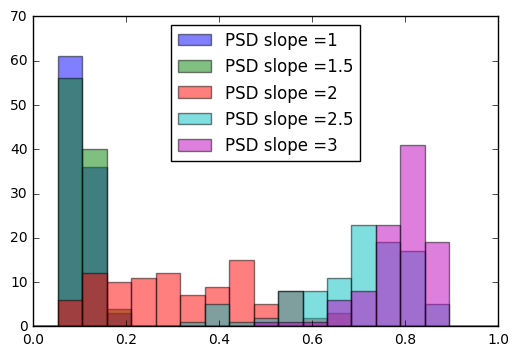

In [118]:
pyplot.hist(total_result[total_result[:,0]==1.0][:,3], bins, alpha=0.5, label='PSD slope =1')
pyplot.hist(total_result[total_result[:,0]==1.5][:,3], bins, alpha=0.5, label='PSD slope =1.5')
pyplot.hist(total_result[total_result[:,0]==2.0][:,3], bins, alpha=0.5, label='PSD slope =2')
pyplot.hist(total_result[total_result[:,0]==2.5][:,3], bins, alpha=0.5, label='PSD slope =2.5')
pyplot.hist(total_result[total_result[:,0]==3.0][:,3], bins, alpha=0.5, label='PSD slope =3')
pyplot.legend(loc='upper center')
pyplot.show()

# Is the limit always the same, running

In [ ]:
import datetime

In [174]:
print(datetime.datetime.now())
r=500
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor[:,0]==n)[0]*r+i))/((len(slope_and_prefactor)*r+1))*100),    
        data=np.load(str(i)+'.npy')
        t=data[:,0]
        y_obs=data[:,1]
        dy_obs=data[:,2]
        period = 10 ** np.linspace(1, 3, 10000)
        omega = 2 * np.pi / period
        PS = lomb_scargle(t, y_obs, dy_obs, omega, generalized=True)
        np.save(str(i)+'PS',PS)
        D = lomb_scargle_bootstrap(t, y_obs, dy_obs, omega, generalized=True,
                           N_bootstraps=100, random_state=0)
        np.save(str(i)+'D',PS)
print(datetime.datetime.now())     

2017-04-20 18:34:57.121564
99.9200319872 2017-04-21 06:05:31.905358


# Is the limit always the same, analysing

In [156]:
r=10
total_result_of_D=np.empty((0,3))
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'/')    
    for i in range(r):
        D=np.load(str(i)+'D.npy')
        total_result_of_D=np.vstack((total_result_of_D,np.hstack((np.array([n,i]),np.percentile(D, [95])))))
        

In [157]:
iterable = (np.mean(total_result_of_D[total_result_of_D[:,0]==n][:,2]) for n in slope_and_prefactor[:,0])
mean_as_function_of_slope=np.c_[slope_and_prefactor[:,0],np.fromiter(iterable, np.float)]

In [158]:
mean_as_function_of_slope

array([[ 1.        ,  0.04994548],
       [ 1.5       ,  0.06642766],
       [ 2.        ,  0.29119714],
       [ 2.5       ,  0.5796227 ],
       [ 3.        ,  0.59648761]])

In [142]:
iterable = (np.std(total_result_of_D[total_result_of_D[:,0]==n][:,2]) for n in slope_and_prefactor[:,0])
np.c_[slope_and_prefactor[:,0],np.fromiter(iterable, np.float)]

array([[ 1.        ,  0.00821508],
       [ 1.5       ,  0.02989107],
       [ 2.        ,  0.11067983],
       [ 2.5       ,  0.10427433],
       [ 3.        ,  0.04999417]])

# Assuming that mean_as_function_of_slope is correct what is the fraction

In [175]:
def fun_check_mas_over_mean_ls(max_data,mean_ls):
    if max_data>mean_ls:
        return np.array([1])
    else:
        return np.array([0])   
    

In [146]:
r=100
total_result_comparison=np.empty((0,3))
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor[:,0]==n)[0]*r+i)/(len(slope_and_prefactor)*2000+1))*100),  
        PS=np.load(str(i)+'PS.npy')
        total_result_comparison=np.vstack((total_result,np.hstack((np.array([n,i]),fun_check_mas_over_mean_ls(np.max(PS),mean_as_function_of_slope[mean_as_function_of_slope[:,0]==n][:,1])))))

4.9895010499


In [162]:
iterable = (np.mean(total_result_comparison[total_result_comparison[:,0]==n][:,2]) for n in slope_and_prefactor[:,0])
fraction_as_function_of_slope=np.c_[slope_and_prefactor[:,0],np.fromiter(iterable, np.float)]

In [163]:
fraction_as_function_of_slope

array([[ 1.        ,  1.        ],
       [ 1.5       ,  0.97      ],
       [ 2.        ,  0.56      ],
       [ 2.5       ,  0.83      ],
       [ 3.        ,  0.98019802]])

In [164]:
mean_as_function_of_slope[mean_as_function_of_slope[:,0]==1][:,1]

array([ 0.04994548])

In [167]:
r=100
total_result_comparison=np.empty((0,3))
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor[:,0]==n)[0]*r+i)/(len(slope_and_prefactor)*2000+1))*100),  
        data=np.load(str(i)+'PS.npy')
        total_result_comparison=np.vstack((total_result,np.hstack((np.array([n,i]),fun_check_mas_over_mean_ls(np.max(data),mean_as_function_of_slope[mean_as_function_of_slope[:,0]==n][:,1])))))

0

In [170]:
n=1.0
r=100
os.chdir(base_dir+str(n)+'/')    
for i in range(r):
    data=np.load(str(i)+'PS.npy')
    print(np.max(data))

0.0994360017877
0.100098791449
0.0818174567286
0.090695175099
0.105929798801
0.11027392396
0.0691661915021
0.136970927719
0.112216326163
0.109092615642
0.0693465065596
0.0866545890647
0.0804422465979
0.0714994453647
0.0748078568928
0.159448481011
0.0999658223965
0.0999739076876
0.0939244634856
0.119884552489
0.0917035400139
0.0881061908784
0.0784068237894
0.140127032431
0.0762883747565
0.14344286076
0.166475121163
0.0919110367787
0.0743475092211
0.0781051300439
0.17510181054
0.0829756497275
0.0870445821349
0.102262285116
0.102233128598
0.146535917133
0.0696214600963
0.0688681327212
0.129160302349
0.0806597591868
0.115606855181
0.123516226196
0.119304219604
0.0846434320344
0.123061247854
0.0693609456678
0.103281470671
0.115793395393
0.0838366747396
0.117760090727
0.141880706984
0.126978652547
0.152921868646
0.149098228827
0.116596943446
0.107991131728
0.0776789839379
0.0976976431136
0.0713607292462
0.104743047514
0.0962186799793
0.0771755872309
0.0749808119025
0.120487919777
0.085061608

# Analysis of full computation

In [176]:
def fun_check_mas_over_mean_ls(max_data,mean_ls):
    if max_data>mean_ls:
        return np.array([1])
    else:
        return np.array([0])   

In [177]:
slope_and_prefactor=np.c_[np.array([1,1.5,2,2.5,3]),np.array([2.45,1.25,0.45,0.16,0.058])]

In [212]:
r=500
total_result=np.empty((0,3))
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor[:,0]==n)[0]*r+i)/(len(slope_and_prefactor)*r+1))*100),  
        data_PS=np.load(str(i)+'PS.npy')
        data_D=np.load(str(i)+'D.npy')
        total_result=np.vstack((total_result,np.hstack((np.array([n,i]),fun_check_mas_over_mean_ls(np.max(data_PS),2*np.percentile(D, [95]))))))

99.9200319872


In [213]:
for n in slope_and_prefactor[:,0]:
    print(np.mean(total_result[total_result[:,0]==n][:,2]))

0.0
0.004
0.728
0.998
1.0


# Analysis with the break

In [4]:
from DELCgen import *
import scipy

In [108]:
# Simulation params
RedNoiseL,RandomSeed,aliasTbin, LClength = 100,12,1,100+4*365+1

In [115]:
delc = Simulate_DE_Lightcurve(BendingPL, (1.0,10**-2,3,0,0.1),scipy.stats.lognorm,(0.3, 0.0, 7.4),LClength=(100+4*365+1))

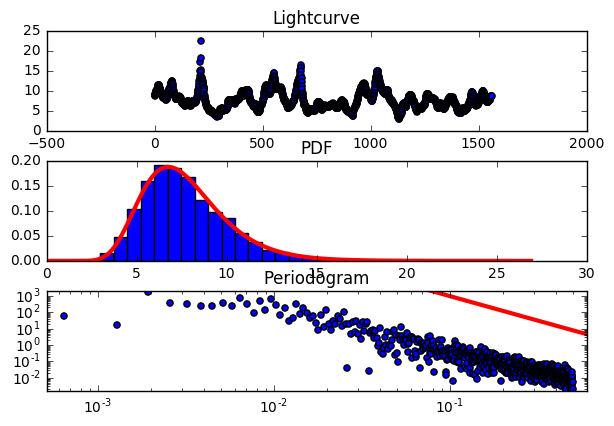

In [116]:
delc.Plot_Stats()

# Creating data with the break

In [2]:
slope_and_prefactor_with_break=np.c_[np.array([1,1.5,2,2.5,3]),np.array([2.45,1.25,0.45,0.16,0.058])]

In [179]:
# Simulation params
RedNoiseL,RandomSeed,aliasTbin, LClength = 100,12,1,100+4*365+1

#Set up the directories where the analysis is done and where the data is stored
base_dir="/export/data1/caplarn/Documents/Variability/SteepPSDandLS/"
for n in slope_and_prefactor_with_break[:,0]:
    os.chdir(base_dir)    
    try:
        os.stat(base_dir+str(n)+'_WithBreak/')
    except:
        os.mkdir(base_dir+str(n)+'_WithBreak/')
    os.chdir(base_dir+str(n)+'_WithBreak/')    
    for i in range(100):
        t1 = np.random.randint(1,100, size=30)
        t2= np.random.randint(1+365,100+365, size=30)
        t3= np.random.randint(1+2*365,100+2*365, size=30)
        t4= np.random.randint(1+3*365,100+3*365, size=30)
        t5= np.random.randint(1+4*365,100+4*365, size=30)
        t=np.concatenate((t1,t2,t3,t4,t5),axis=0)
        delc = Simulate_DE_Lightcurve(BendingPL, (1.0,10**-2,n,0,0.1),scipy.stats.lognorm,(0.3, 0.0, 7.4),LClength=(100+4*365+1))
        y=np.log(delc.flux)
        dy= 0.07 + 0.02 * np.random.rand(LClength)
        y_obs = np.random.normal(y, dy)[t]
        dy_obs=dy[t]
        np.save(str(i)+'_pure_sim',y)
        np.save(str(i),np.c_[t,y_obs,dy_obs])


In [3]:
def compute_sf_log(ligth_curve_sort_and_clean):
    array_of_magnitude_differences = [];
    for n in range(len(ligth_curve_sort_and_clean)-1):
        array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
    array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
    array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
    Structure_Function_Log_Bins = [];
    Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,18,2))
    for n in range(1,len(Array_Of_Log_Limits)-1):
        single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
        Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
    Structure_Function_Log_Bins5=np.vstack(Structure_Function_Log_Bins)
    return Structure_Function_Log_Bins5

In [4]:
r=100
total_result=np.empty((0,4))
for n in slope_and_prefactor_with_break[:,0]:
    os.chdir(base_dir)    
    try:
        os.stat(base_dir+str(n)+'_WithBreak/')
    except:
        os.mkdir(base_dir+str(n)+'_WithBreak/')
    os.chdir(base_dir+str(n)+'_WithBreak/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor_with_break[:,0]==n)[0]*r+i)/(len(slope_and_prefactor_with_break)*r+1))*100),  
        y=np.load(str(i)+'_pure_sim.npy')
        ligth_curve_sort_and_clean=np.c_[(range(0,int(len(y))),y)]
        SF_of_pure_simulation=compute_sf_log(ligth_curve_sort_and_clean)
        total_result=np.vstack((total_result,np.hstack((np.array([n,i]),SF_of_pure_simulation[-2]))))



99.6007984032


In [5]:
total_result_pd=pd.DataFrame(total_result,columns=['slope','index','time','SF2'])

In [6]:
def mean_of_each_slope(n):
    return np.mean(total_result_pd[total_result_pd['slope']==n]['SF2'])
mean_of_each_slope_vector=np.vectorize(mean_of_each_slope)

In [8]:
mean_of_each_slope_vector(np.unique(total_result_pd['slope']))

array([ 0.18103641,  0.18160925,  0.18311043,  0.17982408,  0.18479476])

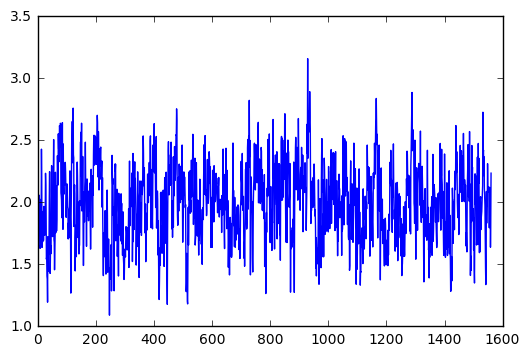

In [21]:
#verify that the light curves really look different
n=1.0
r=5
os.chdir(base_dir+str(n)+'_WithBreak/')    
y=np.load(str(i)+'_pure_sim.npy')
ligth_curve_sort_and_clean=np.c_[(range(0,int(len(y))),y)]
plt.plot(ligth_curve_sort_and_clean[:,1])

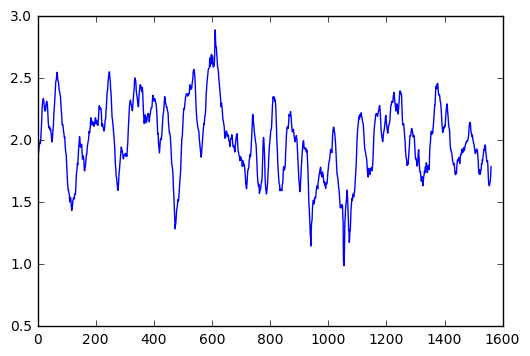

In [22]:
#verify that the light curves really look different
n=3.0
r=5
os.chdir(base_dir+str(n)+'_WithBreak/')    
y=np.load(str(i)+'_pure_sim.npy')
ligth_curve_sort_and_clean=np.c_[(range(0,int(len(y))),y)]
plt.plot(ligth_curve_sort_and_clean[:,1])

# Analysis of full computation

In [23]:
def fun_check_mas_over_mean_ls(max_data,mean_ls):
    if max_data>mean_ls:
        return np.array([1])
    else:
        return np.array([0])   

In [24]:
slope_and_prefactor=np.c_[np.array([1,1.5,2,2.5,3]),np.array([2.45,1.25,0.45,0.16,0.058])]

In [31]:
print(datetime.datetime.now())
r=100
total_result=np.empty((0,3))
for n in slope_and_prefactor[:,0]:
    os.chdir(base_dir+str(n)+'_WithBreak/')    
    for i in range(r):
        print "Progres"+"\r{0}".format((float(np.where(slope_and_prefactor[:,0]==n)[0]*r+i)/(len(slope_and_prefactor)*r+1))*100),  
        data=np.load(str(i)+'.npy')
        t=data[:,0]
        y_obs=data[:,1]
        dy_obs=data[:,2]
        period = 10 ** np.linspace(1, 3, 10000)
        omega = 2 * np.pi / period
        PS = lomb_scargle(t, y_obs, dy_obs, omega, generalized=True)
        np.save(str(i)+'PS',PS)
        D = lomb_scargle_bootstrap(t, y_obs, dy_obs, omega, generalized=True,N_bootstraps=100,random_state=0)
        np.save(str(i)+'D',D)
        total_result=np.vstack((total_result,np.hstack((np.array([n,i]),fun_check_mas_over_mean_ls(np.max(PS),2*np.percentile(D, [95]))))))
print(datetime.datetime.now())        

2017-04-28 19:28:53.567245
99.6007984032 2017-04-28 21:46:35.804318


In [32]:
for n in slope_and_prefactor[:,0]:
    print(np.mean(total_result[total_result[:,0]==n][:,2]))

0.06
0.58
0.86
0.92
0.99


# Analyzing single result and how to show it 

In [46]:
n=3.0
os.chdir(base_dir+str(n)+'_WithBreak/')
def search_for_best(i):
    return np.array([i,max(np.load(str(i)+'PS.npy'))])

In [55]:
x=range(99)
serial_result = np.vstack(map(lambda xv:search_for_best(xv), x))

In [64]:
np.where(serial_result==max(serial_result[:,1]))[0][0]

52

In [65]:
serial_result[np.where(serial_result==max(serial_result[:,1]))[0][0]]

array([ 52.        ,   0.62663272])

In [74]:
n=3.0
i=52
os.chdir(base_dir+str(n)+'_WithBreak/')
data=np.load(str(i)+'.npy')
PS=np.load(str(i)+'PS.npy')
t=data[:,0]
y_obs=data[:,1]
dy_obs=data[:,2]

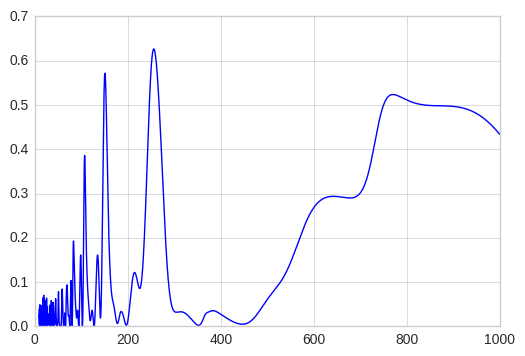

In [71]:
period = 10 ** np.linspace(1, 3, 10000)
plt.plot(period,PS)
best_period=period[np.where(PS==max(PS))[0][0]]

In [78]:
omega_best=(2*np.pi)/best_period
mtf = MultiTermFit(omega_best, 1)
mtf.fit(t, y_obs, dy_obs)
phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

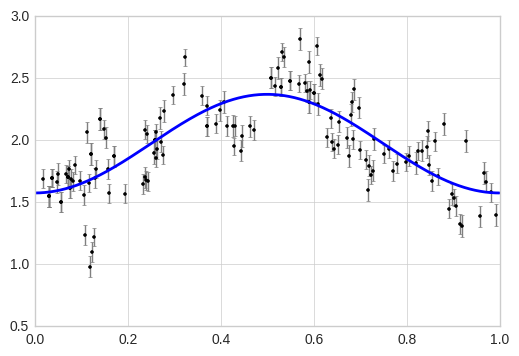

In [82]:
plt.errorbar(phased_t, y_obs, dy_obs, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)
plt.plot(phase_fit, y_fit, '-b', lw=2)

<Container object of 3 artists>

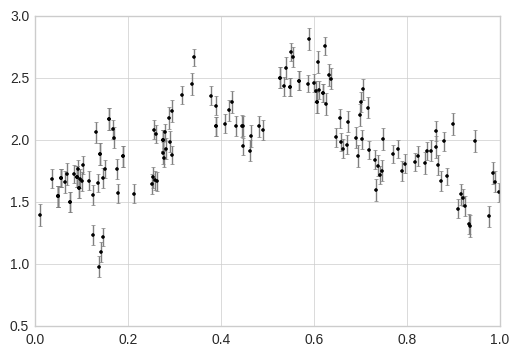

In [121]:
phased_t_manual=(t+0.085*best_period)/(best_period)-np.floor_divide(t+0.085*best_period,best_period)
plt.errorbar(phased_t_manual,y_obs,dy_obs, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)


In [141]:
t2=np.concatenate(((phase_fit-0.085)*best_period,(phase_fit-0.085)*best_period+best_period,(phase_fit-0.085)*best_period+2*best_period,
                (phase_fit-0.085)*best_period+3*best_period,(phase_fit-0.085)*best_period+4*best_period,
                (phase_fit-0.085)*best_period+5*best_period))
y_fit_manual=np.concatenate((y_fit,y_fit,y_fit,y_fit,y_fit,y_fit))

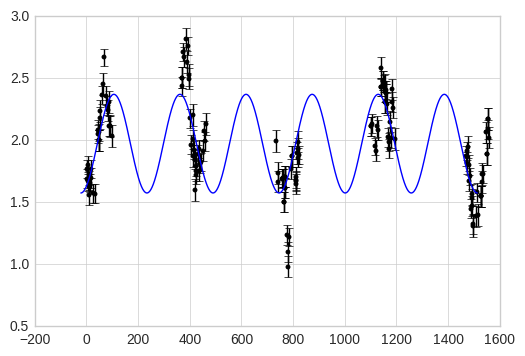

In [142]:
plt.style.use('seaborn-whitegrid')
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt='.k')
t1 = np.arange(0.0, 1600, 1)
plt.plot(t2,y_fit_manual)

# Single result

In [143]:
n=1.0
os.chdir(base_dir+str(n)+'_WithBreak/')
def search_for_best(i):
    return np.array([i,max(np.load(str(i)+'PS.npy'))])

In [145]:
x=range(99)
serial_result = np.vstack(map(lambda xv:search_for_best(xv), x))
np.where(serial_result==max(serial_result[:,1]))[0][0]

70

In [147]:
n=1.0
i=70
os.chdir(base_dir+str(n)+'_WithBreak/')
data=np.load(str(i)+'.npy')
PS=np.load(str(i)+'PS.npy')
t=data[:,0]
y_obs=data[:,1]
dy_obs=data[:,2]

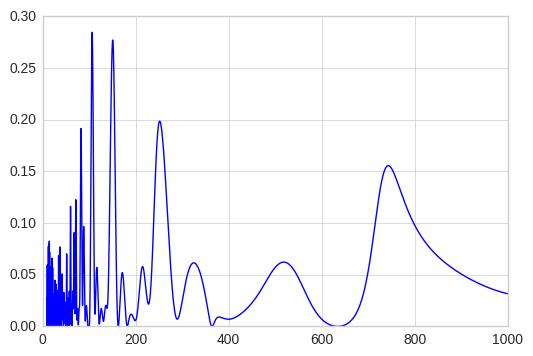

In [148]:
period = 10 ** np.linspace(1, 3, 10000)
plt.plot(period,PS)
best_period=period[np.where(PS==max(PS))[0][0]]

In [163]:
omega_best=(2*np.pi)/best_period
mtf = MultiTermFit(omega_best, 1)
mtf.fit(t, y_obs, dy_obs)
phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

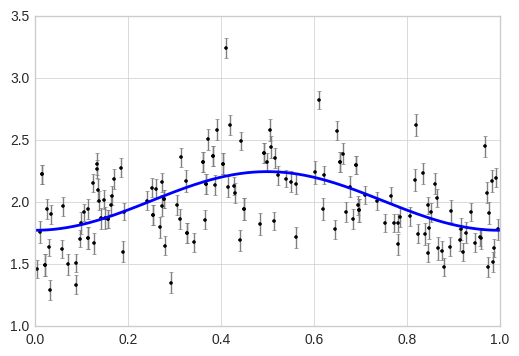

In [164]:
plt.errorbar(phased_t, y_obs, dy_obs, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)
plt.plot(phase_fit, y_fit, '-b', lw=2)

<Container object of 3 artists>

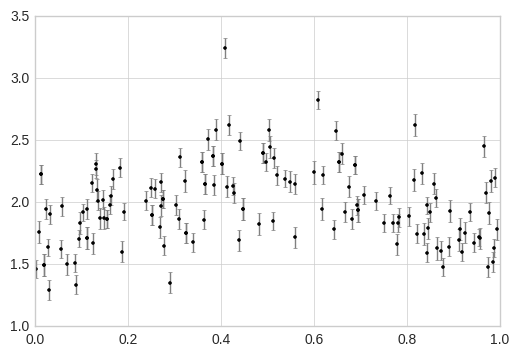

In [167]:
phased_t_manual=(t+0.38*best_period)/(best_period)-np.floor_divide(t+0.38*best_period,best_period)
plt.errorbar(phased_t_manual,y_obs,dy_obs, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)


In [184]:
t2=np.concatenate(((phase_fit-0.38)*best_period,(phase_fit-0.38)*best_period+best_period,(phase_fit-0.38)*best_period+2*best_period,
                (phase_fit-0.38)*best_period+3*best_period,(phase_fit-0.38)*best_period+4*best_period,
                (phase_fit-0.38)*best_period+5*best_period,(phase_fit-0.38)*best_period+6*best_period,
                (phase_fit-0.38)*best_period+7*best_period,(phase_fit-0.38)*best_period+8*best_period,
                (phase_fit-0.38)*best_period+9*best_period,(phase_fit-0.38)*best_period+10*best_period,
                (phase_fit-0.38)*best_period+11*best_period,(phase_fit-0.38)*best_period+12*best_period,
                (phase_fit-0.38)*best_period+13*best_period,(phase_fit-0.38)*best_period+14*best_period,
                (phase_fit-0.38)*best_period+15*best_period))
y_fit_manual=np.concatenate((y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit,y_fit))

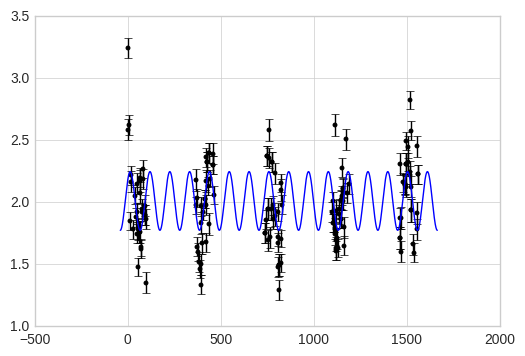

In [185]:
plt.style.use('seaborn-whitegrid')
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt='.k')
t1 = np.arange(0.0, 1600, 1)
plt.plot(t2,y_fit_manual)